Ingredients EDA

In [32]:
def extract_ingredients(row):
    row_values = row.tolist()
    ingredients = []
    for i in range(1, len(row_values) - 1): # First column is dish id
        current_value = str(row_values[i])
        next_value = str(row_values[i + 1])

        if current_value.startswith('ingr_'):
            if next_value not in sauces:
                ingredients.append(next_value)
    return ingredients

In [33]:
def add_unique_items(list1, list2):
    for item in list2:
        if item not in list1:
          list1.append(item)
    return list1

In [35]:
import pandas as pd
import os
from tqdm import tqdm
dirname = os.path.dirname(os.getcwd())
input_filepath = os.path.join(dirname, r"data/raw/Nutrition5kModified700.csv")
sauces_filepath = os.path.join(dirname, r"data/raw/nutrition5k_dataset_metadata_ingredients_metadata.csv")
df = pd.read_csv(input_filepath, header=None)
sauces_df = pd.read_csv(sauces_filepath)
sauces = sauces_df[sauces_df['IsSauce'] == 'Yes']
sauces = sauces['ingr'].tolist()
total_ingredients = []
for _, row in tqdm(df.iterrows(), total=len(df)):
    curr_ingredients = extract_ingredients(row)
    if len(total_ingredients) == 0:
        total_ingredients = curr_ingredients
    else:
        total_ingredients = add_unique_items(total_ingredients, curr_ingredients)

100%|██████████| 690/690 [00:00<00:00, 3224.30it/s]


## Get Dataset Distribution

There are 869 dishes in the dataset


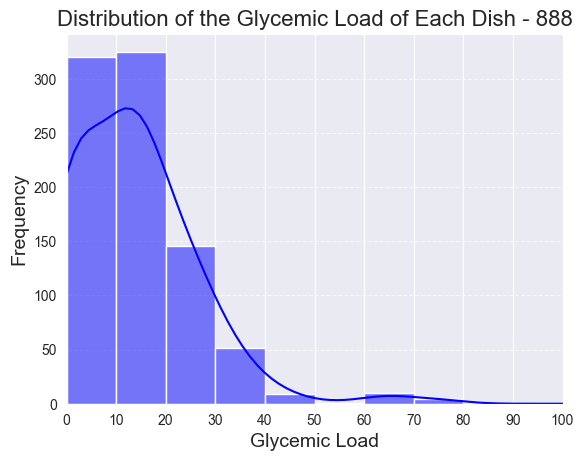

The average glycemic load is: 14.918257044856166


In [102]:
import numpy as np
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt

path = r"/Portions Estimation/data/ingredients/ingredients-classification-balanced.csv"
df = pd.read_csv(path)

grouped_dishes = df.groupby('Dish ID')
gl = []

print(f'There are {grouped_dishes.ngroups} dishes in the dataset')

for group in grouped_dishes.groups:
    gl.append(grouped_dishes.get_group(group)['Glycemic Load'].sum())

bins = np.arange(0, 101, 10)
sns.histplot(gl, kde=True, color='blue', bins=bins)
plt.title('Distribution of the Glycemic Load of Each Dish - 888', fontsize=16)
plt.xlabel('Glycemic Load', fontsize=14)
plt.ylabel('Frequency', fontsize=14)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.xlim((0,100))
plt.xticks(bins)
plt.show()

print(f'The average glycemic load is: {sum(gl)/len(gl)}')

ValueError: Unable to determine Axes to steal space for Colorbar. Either provide the *cax* argument to use as the Axes for the Colorbar, provide the *ax* argument to steal space from it, or add *mappable* to an Axes.

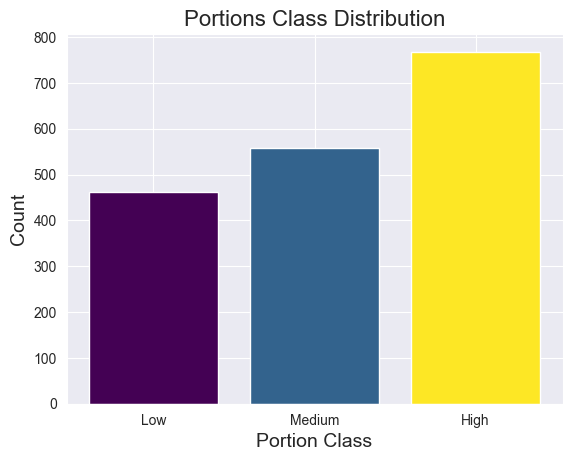

In [2]:
import matplotlib.pyplot as plt
import numpy as np

# Data
classes = ['Low', 'Medium', 'High']
values = [463, 559, 768]

# Define a colormap based on values
colors = plt.cm.viridis((np.array(values) - min(values)) / (max(values) - min(values)))

# Plot
plt.bar(classes, values, color=colors)
plt.title('Portions Class Distribution', fontsize=16)
plt.xlabel('Portion Class', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.colorbar(plt.cm.ScalarMappable(cmap='viridis'), label='Value Magnitude', orientation='vertical')
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Show the plot
plt.show()


In [99]:
path = r"/Portions Estimation/data/ingredients/ingredients-classification-balanced.csv"
df = pd.read_csv(path)

low_gl = []
medium_gl = []
high_gl = []

grouped_dishes = df.groupby('Dish ID')

print(f'There are {grouped_dishes.ngroups} dishes in the dataset')

for group in grouped_dishes.groups:
    classification = grouped_dishes.get_group(group)['Class'].tolist()[0]
    if classification == 1:
        low_gl.append(classification)
    elif classification == 2:
        medium_gl.append(classification)
    else:
        high_gl.append(classification)

print(f'There are: {len(low_gl)} low glycemic load dishes')
print(f'There are: {len(medium_gl)} medium glycemic load dishes')
print(f'There are: {len(high_gl)} high glycemic load dishes')

There are 869 dishes in the dataset
There are: 300 low glycemic load dishes
There are: 338 medium glycemic load dishes
There are: 231 high glycemic load dishes


## Claude Analysis

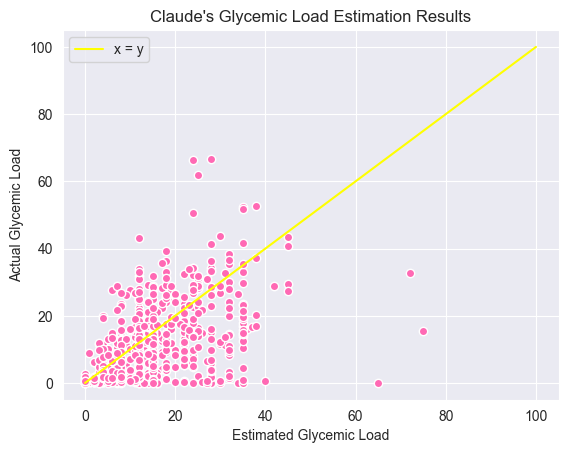

In [15]:
claude_estimation_results = r"C:\Users\rotem.geva\OneDrive - Afeka College Of Engineering\Final Project\Portions Estimation\ClaudeGlycemicLoadEstimationResults.csv"
df = pd.read_csv(claude_estimation_results)
estimated = df.iloc[:, 2]
actual = df.iloc[:, 1]
x = np.linspace(0, 100)
y = x
plt.plot(estimated, actual, 'o', markerfacecolor='hotpink',
    markeredgecolor='white',
    markeredgewidth=1.0)
plt.plot(x, y, label="x = y", color="yellow")
plt.title("Claude's Glycemic Load Estimation Results")
plt.xlabel("Estimated Glycemic Load")
plt.ylabel("Actual Glycemic Load")
plt.legend()